### https://github.com/teto-ri/Kaggle-Project/blob/master/Predict_Future_Sales/predict-future-sales.ipynb  

Predict Future Sales PART 참고함 

### 하단부터 이 코드는 주택 가격 예측을 위한 XGBoost 모델을 구축, 훈련, 평가 및 예측하는 전체 파이프라인을 포함

### 
XGBoost와 RandomForest는 모두 강력한 앙상블 학습 알고리즘이지만, 그들 간에는 몇 가지 중요한 차이점이 있습니다. 각 모델은 특정 유형의 데이터 및 문제에 대해 더 잘 작동할 수 있습니다. 두 모델의 차이점을 설명하고, 그들이 다른 문제에 어떻게 더 적합한지 설명하겠습니다.

Random Forest (랜덤 포레스트)
알고리즘 개요:

여러 개의 독립적인 결정 트리를 학습하여 각 트리의 예측을 평균 내거나 다수결 투표를 통해 최종 예측을 만듭니다.
각 트리는 학습 시 무작위로 선택된 데이터 샘플과 피처의 서브셋을 사용합니다.
특징:

병렬화 가능성: 각 트리를 독립적으로 학습할 수 있어 병렬 처리가 가능합니다.
과적합 방지: 여러 트리의 예측을 평균화하여 과적합을 방지합니다.
단순성: 비교적 이해하고 구현하기 쉽습니다.
장점:

데이터의 노이즈에 강합니다.
피처 중요도 측정이 가능합니다.
범용성: 다양한 유형의 데이터에 대해 잘 작동합니다.
단점:

의사결정 경계가 샤프하지 않으며, 복잡한 데이터에서 덜 정확할 수 있습니다.
많은 트리가 필요할 경우 메모리 사용량이 많아질 수 있습니다.
XGBoost (Extreme Gradient Boosting)
알고리즘 개요:

각 트리가 이전 트리의 오류를 보정하는 방식으로 순차적으로 학습합니다.
그레디언트 부스팅 알고리즘을 확장한 버전으로, 경사 하강법을 사용하여 손실 함수를 최소화합니다.
특징:

순차적 학습: 각 트리가 이전 트리의 오류를 보정하는 방식으로 학습됩니다.
손실 함수 최적화: 경사 하강법을 사용하여 손실 함수를 최적화합니다.
정규화: 과적합을 방지하기 위한 다양한 정규화 기법을 포함합니다.
장점:

높은 예측 성능: 특히 구조적 데이터에서 매우 높은 예측 성능을 보입니다.
과적합 방지: L1, L2 정규화 및 트리 프루닝 등의 다양한 기법을 통해 과적합을 방지합니다.
커스터마이징 가능성: 다양한 하이퍼파라미터 튜닝이 가능하여 모델을 세밀하게 조정할 수 있습니다.
빠른 학습 속도: 병렬 처리와 캐싱 기법을 통해 빠른 학습 속도를 자랑합니다.
단점:

복잡성: 구현과 튜닝이 복잡할 수 있습니다.
메모리 사용량: 큰 데이터셋에서 메모리 사용량이 많을 수 있습니다.
차이점 요약
학습 방식: RandomForest는 여러 독립적인 트리를 병렬로 학습하는 반면, XGBoost는 트리를 순차적으로 학습합니다.
성능: XGBoost는 보통 더 높은 예측 성능을 보이며, 특히 구조적 데이터에서 탁월한 성능을 발휘합니다.
과적합 방지: XGBoost는 정규화 기법을 포함하여 과적합을 방지하는 데 더 많은 기법을 사용합니다.
병렬 처리: RandomForest는 트리 학습이 병렬로 가능하지만, XGBoost는 병렬 처리가 제한적이며 주로 순차적으로 트리를 학습합니다.
튜닝 복잡성: XGBoost는 하이퍼파라미터가 더 많아 튜닝이 더 복잡할 수 있습니다.
어떤 모델을 선택할 것인가?
RandomForest: 빠르게 실행하고 간단한 베이스라인 모델이 필요하거나, 데이터가 노이즈가 많고 이해하기 쉬운 모델이 필요한 경우.
XGBoost: 높은 예측 성능이 필요하고, 하이퍼파라미터 튜닝에 시간을 투자할 수 있는 경우.

### kaggle 집값 예측 문제

columns

- `house_id` - 주택 id변수
- `date` - 판매된 날자
- `location` - 주택 위치
- `type` - 주택 유형 ("2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM", "EXECUTIVE")
- `block` - 주택이 위치한 블록
- `street` - 주택이 위치한 거리
- `storey_range` - 주택이 위치한 층 범위
- `flat_model` - 주택의 모델(구조, 방 배치 등)
- `commence_date` - 주택이 판매에 올라온 날짜
- `price` - 판매 가격 (목표 변수)

다양한 변수를 사용하여 짒값을 예측한다
-> baseline code작성

In [1]:
import pandas as pd #데이터 처리를 위한 pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler #모델 평가를 위한 scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import time
import itertools
import os
import gc
import pickle
from xgboost import XGBRegressor #모델 구축을 위한 XGBoost
from xgboost import plot_importance
from matplotlib import rcParams #시각화를 위한 matplotlib

# 그림 크기 설정: matplotlib의 그림 크기를 설정합니다.
rcParams['figure.figsize'] = 12, 4 

In [2]:
#데이터 불러오기
try:
    test = pd.read_csv('Data/test.csv', encoding='utf-8')
    train = pd.read_csv('Data/train.csv', encoding='utf-8')
except UnicodeDecodeError:
    #UTF-8로 실패한 경우 CP949로 재시도
    test = pd.read_csv('Data/test.csv', encoding='cp949')
    train = pd.read_csv('Data/train.csv', encoding='cp949')    

In [3]:
 train.head(5)

,house_id,date,location,type,block,street,storey_range,area_sqm,flat_model,commence_date,price
0,199577,2006-09,Raleigh,5 ROOM,107D,Agawan Court,07 TO 09,110.0,D,2003,313000.0
1,217021,2007-06,Fresno,3 ROOM,678,Cleo St,07 TO 09,64.0,N,1988,167000.0
2,308062,2010-09,Tucson,4 ROOM,5,E Pleasant View Way,10 TO 12,92.0,K,1976,430000.0
3,212465,2007-04,Austin,4 ROOM,326,Park Hollow Ln,10 TO 12,92.0,K,1977,303800.0
4,60654,2001-10,Honolulu,4 ROOM,794,Ala Puawa Place,04 TO 06,102.0,G,1998,212000.0


In [4]:
test.head()

,house_id,date,location,type,block,street,storey_range,area_sqm,flat_model,commence_date
0,2,2000-01,Austin,3 ROOM,174,Governors Row,04 TO 06,61.0,D,1986
1,5,2000-01,Austin,3 ROOM,218,Stonleigh Pl,07 TO 09,67.0,K,1976
2,22,2000-01,Austin,3 ROOM,443,Palisades Point Cove,07 TO 09,67.0,K,1979
3,23,2000-01,Austin,3 ROOM,443,Palisades Point Cove,07 TO 09,67.0,K,1979
4,28,2000-01,Austin,3 ROOM,435,Palisades Point Cove,04 TO 06,67.0,K,1979


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271721 entries, 0 to 271720
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   house_id       271721 non-null  int64  
 1   date           271721 non-null  object 
 2   location       271721 non-null  object 
 3   type           271721 non-null  object 
 4   block          271721 non-null  object 
 5   street         271721 non-null  object 
 6   storey_range   271721 non-null  object 
 7   area_sqm       271721 non-null  float64
 8   flat_model     271721 non-null  object 
 9   commence_date  271721 non-null  int64  
 10  price          271721 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 22.8+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67930 entries, 0 to 67929
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       67930 non-null  int64  
 1   date           67930 non-null  object 
 2   location       67930 non-null  object 
 3   type           67930 non-null  object 
 4   block          67930 non-null  object 
 5   street         67930 non-null  object 
 6   storey_range   67930 non-null  object 
 7   area_sqm       67930 non-null  float64
 8   flat_model     67930 non-null  object 
 9   commence_date  67930 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 5.2+ MB


In [7]:
train.isnull().sum()

house_id         0
date             0
location         0
type             0
block            0
street           0
storey_range     0
area_sqm         0
flat_model       0
commence_date    0
price            0
dtype: int64

In [8]:
test.isnull().sum()

house_id         0
date             0
location         0
type             0
block            0
street           0
storey_range     0
area_sqm         0
flat_model       0
commence_date    0
dtype: int64

In [9]:
train.duplicated().sum()
#중복 데이터 확인

0

In [10]:
train[train.duplicated()==True]

,house_id,date,location,type,block,street,storey_range,area_sqm,flat_model,commence_date,price


In [11]:
train.drop_duplicates(inplace=True)

In [12]:
train.duplicated().sum()

0

<Axes: >

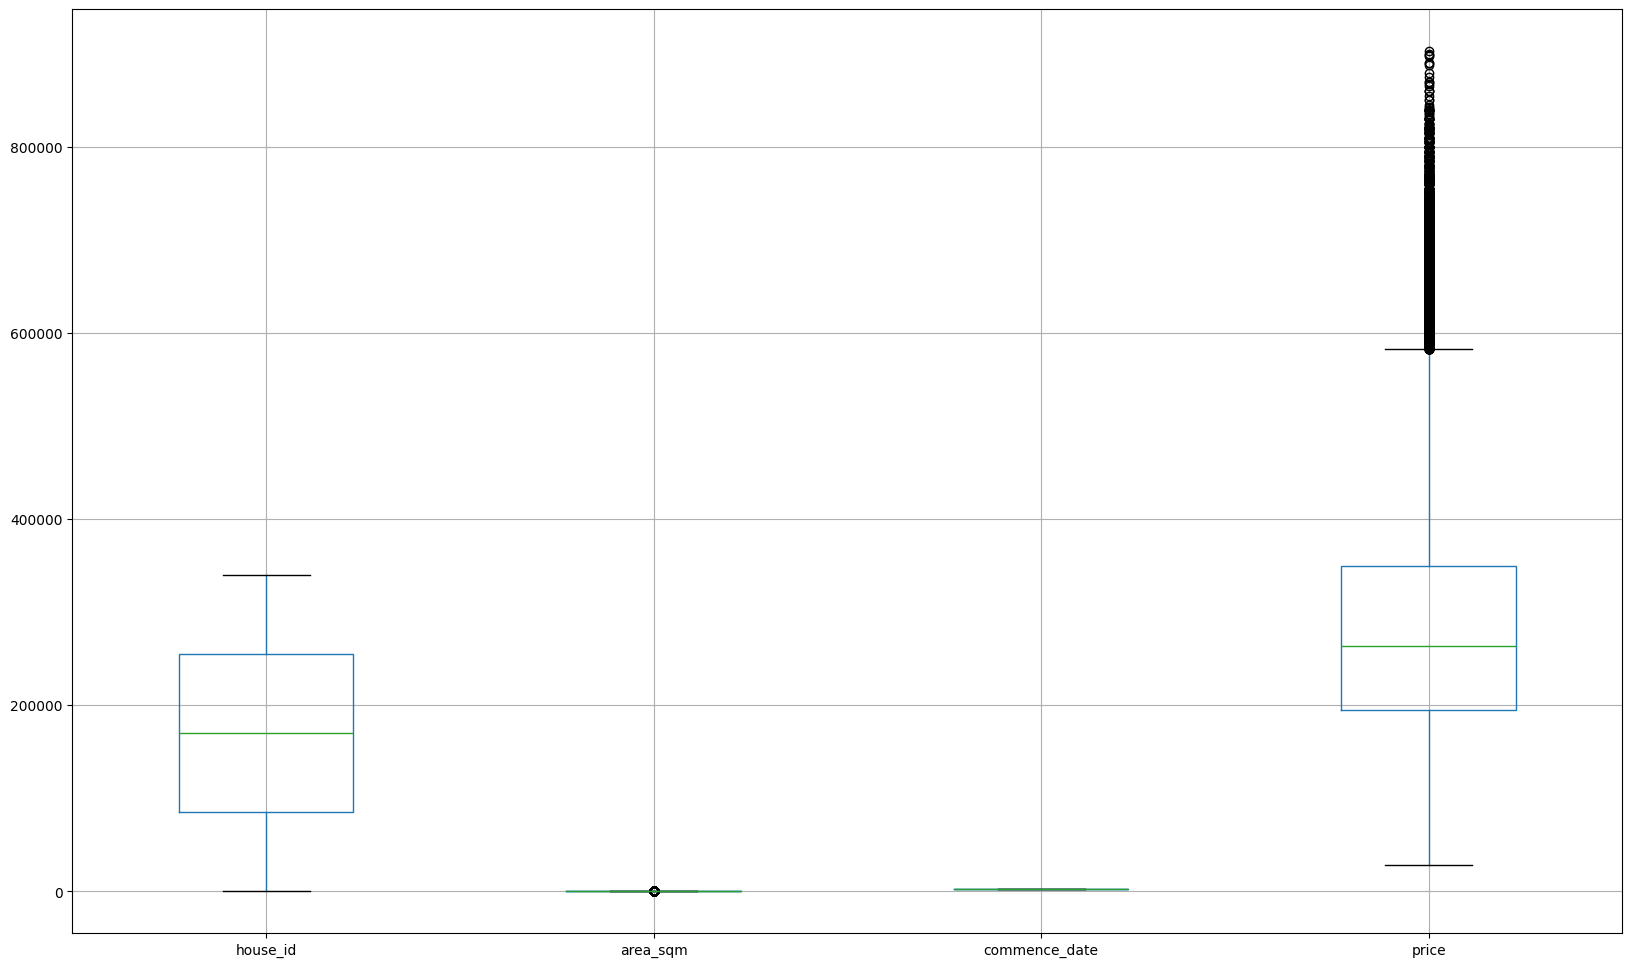

In [13]:
plt.figure(figsize=(20,12))
train.boxplot()

<Axes: xlabel='price'>

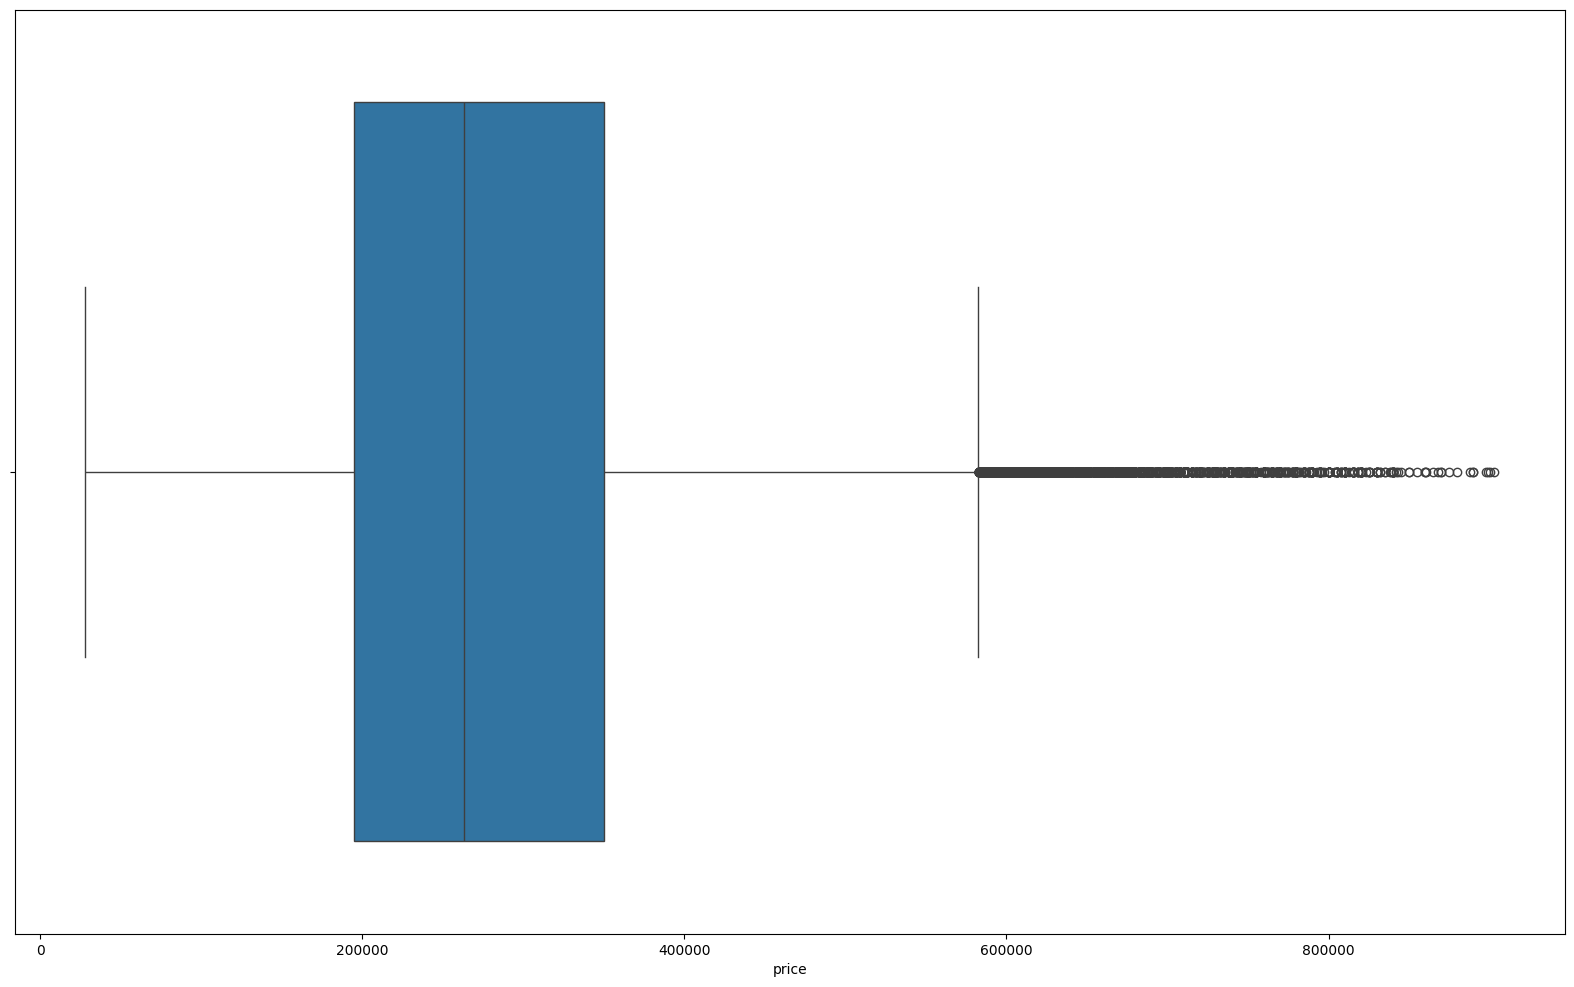

In [14]:
plt.figure(figsize=(20,12))
sns.boxplot(x='price', data = train)

<Axes: xlabel='date'>

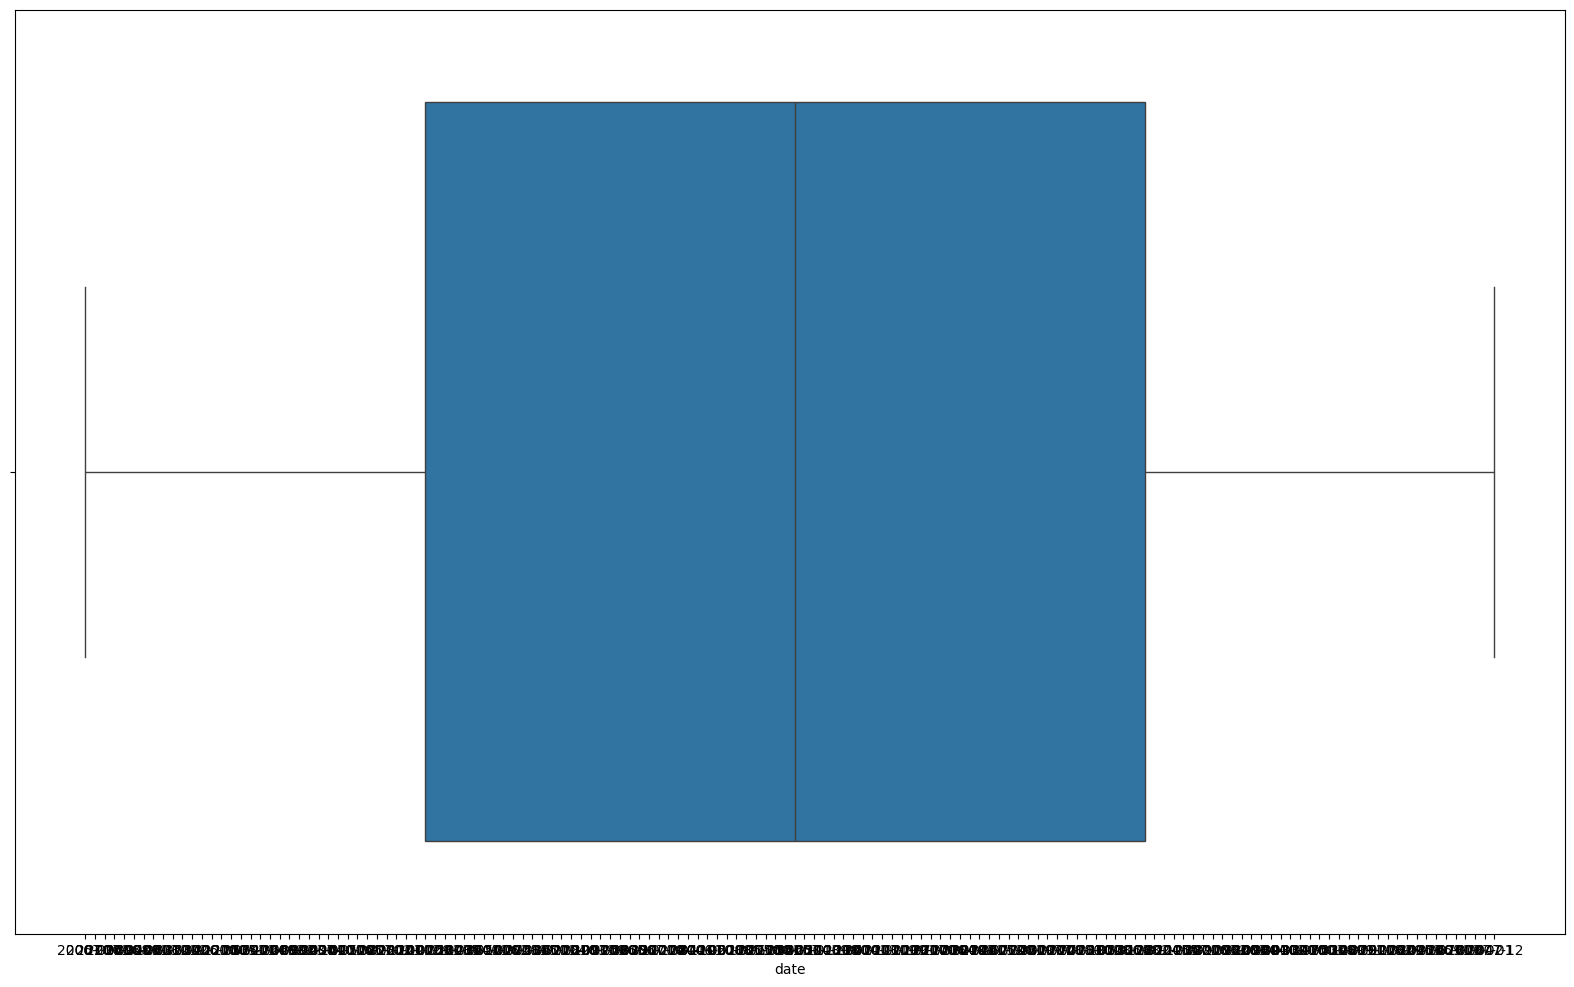

In [15]:
#주택이 판매된 날짜
plt.figure(figsize=(20,12))
sns.boxplot(x='date', data = train)

<Axes: xlabel='commence_date'>

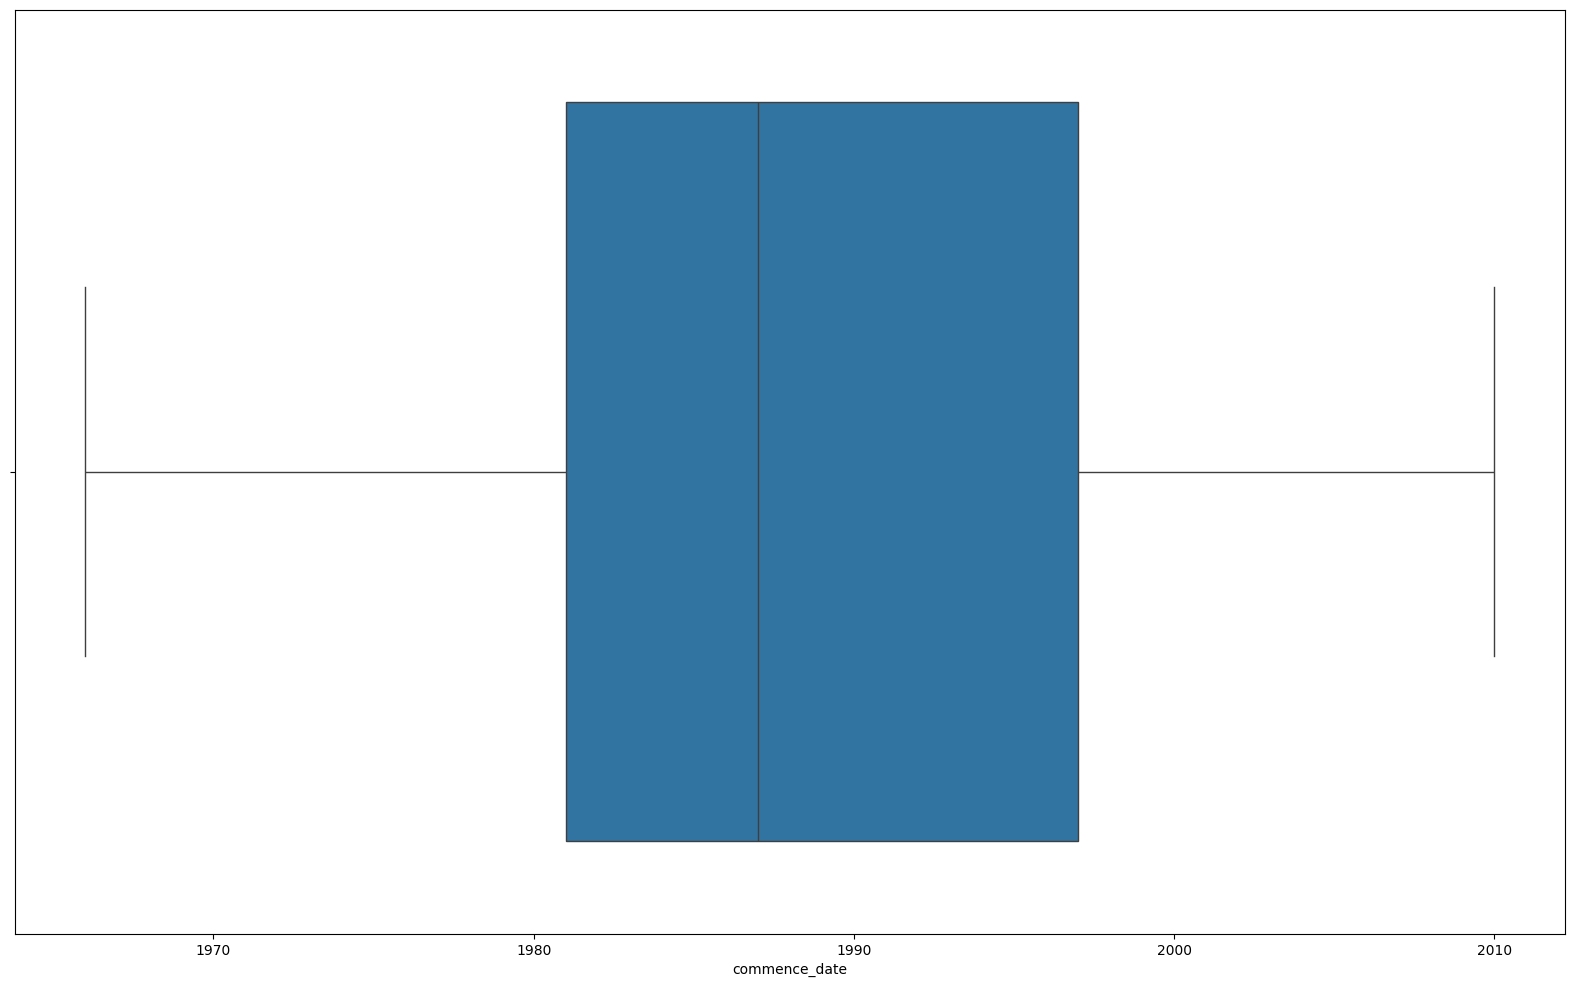

In [16]:
#주택이 판매에 올라온 날짜
plt.figure(figsize=(20,12))
sns.boxplot(x='commence_date', data = train)

In [17]:
train.shape

(271721, 11)

In [18]:
test.shape

(67930, 10)

In [19]:
train.describe()

,house_id,area_sqm,commence_date,price
count,271721.000000,271721.000000,271721.000000,271721.000000
mean,169785.994870,96.544832,1987.982942,281197.589537
std,98022.533902,25.587877,9.125141,112160.993184
min,1.000000,28.000000,1966.000000,28000.000000
25%,85021.000000,73.000000,1981.000000,195000.000000
50%,169739.000000,99.000000,1987.000000,263000.000000
75%,254609.000000,115.000000,1997.000000,350000.000000
max,339651.000000,280.000000,2010.000000,903000.000000


### Data Preprocessing

In [20]:
#address 컬럼을 생성 후, location 과 street 컬럼을 합쳐 ' ' 으로 구분되도록 함.

train['address'] = train['location'] + ' ' + train['street']

train

,house_id,date,location,type,block,street,storey_range,area_sqm,flat_model,commence_date,price,address
0,199577,2006-09,Raleigh,5 ROOM,107D,Agawan Court,07 TO 09,110.0,D,2003,313000.0,Raleigh Agawan Court
1,217021,2007-06,Fresno,3 ROOM,678,Cleo St,07 TO 09,64.0,N,1988,167000.0,Fresno Cleo St
2,308062,2010-09,Tucson,4 ROOM,5,E Pleasant View Way,10 TO 12,92.0,K,1976,430000.0,Tucson E Pleasant View Way
3,212465,2007-04,Austin,4 ROOM,326,Park Hollow Ln,10 TO 12,92.0,K,1977,303800.0,Austin Park Hollow Ln
4,60654,2001-10,Honolulu,4 ROOM,794,Ala Puawa Place,04 TO 06,102.0,G,1998,212000.0,Honolulu Ala Puawa Place
...,...,...,...,...,...,...,...,...,...,...,...,...
271716,101563,2003-01,Omaha,4 ROOM,483,Sandra Ln,04 TO 06,103.0,G,1989,232000.0,Omaha Sandra Ln
271717,28297,2000-11,Omaha,5 ROOM,615,Atkin Rd,10 TO 12,134.0,G,1996,428000.0,Omaha Atkin Rd
271718,321995,2011-04,Boston,5 ROOM,390,Kempton Street,13 TO 15,118.0,D,2004,548888.0,Boston Kempton Street
271719,308162,2010-09,Fresno,4 ROOM,968,Magnolia Dale Dr,13 TO 15,90.0,I,1999,360000.0,Fresno Magnolia Dale Dr


In [21]:
#새로 생성 된 address 컬럼의 내용을 임의로 바꿔서 맛있게 먹어보자
train.loc[train['address'] == 'Omaha Sandra Ln', 'address'] = 'Ohama Daegari GMT'

In [22]:
train['address'].value_counts()

address
Riverside Laredo Rd            4569
Austin Palisades Point Cove    3903
Seatle 50th Avenue NE          3608
Austin Park Hollow Ln          3383
Fresno Cleo St                 2735
                               ... 
Seatle Holly Ter S                3
Tucson Wade Pl                    3
Atlanta Lullwater Park Way        1
Raleigh Marvin Place              1
Minneapolis Dakota Rd             1
Name: count, Length: 523, dtype: int64

In [23]:
train

,house_id,date,location,type,block,street,storey_range,area_sqm,flat_model,commence_date,price,address
0,199577,2006-09,Raleigh,5 ROOM,107D,Agawan Court,07 TO 09,110.0,D,2003,313000.0,Raleigh Agawan Court
1,217021,2007-06,Fresno,3 ROOM,678,Cleo St,07 TO 09,64.0,N,1988,167000.0,Fresno Cleo St
2,308062,2010-09,Tucson,4 ROOM,5,E Pleasant View Way,10 TO 12,92.0,K,1976,430000.0,Tucson E Pleasant View Way
3,212465,2007-04,Austin,4 ROOM,326,Park Hollow Ln,10 TO 12,92.0,K,1977,303800.0,Austin Park Hollow Ln
4,60654,2001-10,Honolulu,4 ROOM,794,Ala Puawa Place,04 TO 06,102.0,G,1998,212000.0,Honolulu Ala Puawa Place
...,...,...,...,...,...,...,...,...,...,...,...,...
271716,101563,2003-01,Omaha,4 ROOM,483,Sandra Ln,04 TO 06,103.0,G,1989,232000.0,Ohama Daegari GMT
271717,28297,2000-11,Omaha,5 ROOM,615,Atkin Rd,10 TO 12,134.0,G,1996,428000.0,Omaha Atkin Rd
271718,321995,2011-04,Boston,5 ROOM,390,Kempton Street,13 TO 15,118.0,D,2004,548888.0,Boston Kempton Street
271719,308162,2010-09,Fresno,4 ROOM,968,Magnolia Dale Dr,13 TO 15,90.0,I,1999,360000.0,Fresno Magnolia Dale Dr


In [24]:
#라벨 인코딩: 모델이 이해하기 쉽도록 범주형 데이터를 숫자로 분류하여 줌
train['address_code'] = LabelEncoder().fit_transform(train['address'])

categorial_features = ['type', 'block', 'storey_range', 'flat_model']
numerical_features = ['area_sqm']

le = LabelEncoder()
for i in categorial_features:
    train[i] = le.fit_transform(train[i])

scaler = MinMaxScaler()
train[numerical_features] = scaler.fit_transform(train[numerical_features])

In [25]:
#라벨 인코딩 후 Object(문자열) 컬럼들을 제거 함.
train = train.drop(['address', 'location', 'street'], axis = 1)

In [26]:
tmp = {}
tmp['date'] = pd.to_datetime(train['date'])
train['year'] = tmp['date'].dt.year
train['month'] = tmp['date'].dt.month
train.drop('date', axis = 1, inplace = True)

In [27]:
train

,house_id,type,block,storey_range,area_sqm,flat_model,commence_date,price,address_code,year,month
0,199577,4,34,2,0.325397,3,2003,313000.0,346,2006,9
1,217021,2,1445,2,0.142857,13,1988,167000.0,131,2007,6
2,308062,3,1092,3,0.253968,10,1976,430000.0,458,2010,9
3,212465,3,742,3,0.253968,10,1977,303800.0,62,2007,4
4,60654,3,1662,1,0.293651,6,1998,212000.0,153,2001,10
...,...,...,...,...,...,...,...,...,...,...,...
271716,101563,3,1004,1,0.297619,6,1989,232000.0,300,2003,1
271717,28297,4,1257,3,0.420635,6,1996,428000.0,301,2000,11
271718,321995,4,853,4,0.357143,3,2004,548888.0,78,2011,4
271719,308162,3,1936,4,0.246032,8,1999,360000.0,136,2010,9


In [28]:
# 데이터 저장 및 로드
train.to_pickle('Data/data.pkl') #데이터를 data.pkl 파일로 데이터 저장
gc.collect() #가비지 컬렉션 수행
data = pd.read_pickle('Data/data.pkl') # 데이터 로드

- 데이터 저장: 전처리된 데이터를 data.pkl 파일로 저장합니다.

- 가비지 컬렉션: 사용되지 않는 메모리를 회수하여 메모리 사용량을 최적화합니다.

- 데이터 로드: 저장한 데이터를 다시 불러옵니다.

In [29]:
data

,house_id,type,block,storey_range,area_sqm,flat_model,commence_date,price,address_code,year,month
0,199577,4,34,2,0.325397,3,2003,313000.0,346,2006,9
1,217021,2,1445,2,0.142857,13,1988,167000.0,131,2007,6
2,308062,3,1092,3,0.253968,10,1976,430000.0,458,2010,9
3,212465,3,742,3,0.253968,10,1977,303800.0,62,2007,4
4,60654,3,1662,1,0.293651,6,1998,212000.0,153,2001,10
...,...,...,...,...,...,...,...,...,...,...,...
271716,101563,3,1004,1,0.297619,6,1989,232000.0,300,2003,1
271717,28297,4,1257,3,0.420635,6,1996,428000.0,301,2000,11
271718,321995,4,853,4,0.357143,3,2004,548888.0,78,2011,4
271719,308162,3,1936,4,0.246032,8,1999,360000.0,136,2010,9


### 하단부터 모델 훈련 및 예측

In [30]:
X = train.drop('price', axis = 1)
y = train['price']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
ts = time.time()

model = XGBRegressor(
    max_depth = 10,
    n_estimators=1000,
    min_child_weight=0.5,
    colsample_bytree=0.8,
    subsample=0.8,
    eta=0.1,
    seed=77
)

model.fit(
    X_train,
    y_train,
    eval_metric="rmse",
    eval_set = [(X_train, y_train), (X_test, y_test)],
    verbose = True,
    early_stopping_rounds=20
)

time.time() - ts

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

[0]	validation_0-rmse:102196.41760	validation_1-rmse:101942.59685
[1]	validation_0-rmse:93797.80592	validation_1-rmse:93591.80358
[2]	validation_0-rmse:86553.68815	validation_1-rmse:86402.51037
[3]	validation_0-rmse:79262.87090	validation_1-rmse:79163.56669
[4]	validation_0-rmse:72763.52546	validation_1-rmse:72705.09503
[5]	validation_0-rmse:67006.98365	validation_1-rmse:66989.58497


c:\Users\cchok\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\cchok\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:61804.10067	validation_1-rmse:61824.29984
[7]	validation_0-rmse:57218.17113	validation_1-rmse:57286.45678
[8]	validation_0-rmse:53436.67387	validation_1-rmse:53559.55800
[9]	validation_0-rmse:49761.02499	validation_1-rmse:49947.30792
[10]	validation_0-rmse:46580.52958	validation_1-rmse:46836.87210
[11]	validation_0-rmse:43664.88460	validation_1-rmse:43990.15931
[12]	validation_0-rmse:40953.56421	validation_1-rmse:41365.28407
[13]	validation_0-rmse:38587.92741	validation_1-rmse:39044.07335
[14]	validation_0-rmse:36630.24228	validation_1-rmse:37162.14183
[15]	validation_0-rmse:34848.54394	validation_1-rmse:35439.65983
[16]	validation_0-rmse:33394.37551	validation_1-rmse:34042.94466
[17]	validation_0-rmse:31984.24421	validation_1-rmse:32692.54708
[18]	validation_0-rmse:30731.82332	validation_1-rmse:31506.12093
[19]	validation_0-rmse:29549.87043	validation_1-rmse:30377.94030
[20]	validation_0-rmse:28732.11412	validation_1-rmse:29621.55131
[21]	validation_0-rmse:27770.

- 모델 설정: XGBoost 모델을 설정합니다. 주요 매개변수는 최대 깊이, 트리 수, 자식 노드의 최소 가중치, 트리별 열 샘플 비율, 샘플 비율, 학습률, 시드 값 등입니다.

- 모델 훈련: 설정된 매개변수로 모델을 훈련시킵니다. RMSE를 평가 지표로 사용하고, 조기 종료를 위해 early_stopping_rounds를 20으로 설정합니다.

- 예측 값: 훈련 세트와 테스트 세트에 대해 예측 값을 생성하고, 예측 값을 0과 20 사이로 클리핑합니다. 였으나 clip 함수를 제거하고 실행해보니 ID별 예측 값이 나온다는 걸 확인 할수 있었다.

XGBoost Regressor 모델을 설정하고, 훈련시킵니다. eval_metric을 "rmse"로 설정하고, 훈련 데이터와 테스트 데이터를 평가 세트로 사용하여 조기 종료(early_stopping_rounds=20)를 설정합니다.

In [33]:
X_test.shape

(54345, 10)

### 하단부터 예측 값 저장 및 시각화

In [34]:
sub = pd.DataFrame({
    "house_id" : X_test.index,
    "price":y_pred_test
})

sub.to_csv('xgb_sub.csv', index = False)

pickle.dump(y_pred_train, open('Data/xgb_train.pickle','wb'))
pickle.dump(y_pred_test, open('Data/xgb_test.pickle','wb'))

- 예측 값 저장: 테스트 세트의 예측 값을 데이터프레임으로 변환하고 xgb_sub.csv 파일로 저장합니다.

- 예측 값 피클 파일로 저장: 훈련 세트와 테스트 세트의 예측 값을 각각 피클 파일로 저장합니다.

수정 사항
데이터 준비 및 분할:

train_test_split을 사용하여 X와 y 데이터를 분리합니다.
모델 예측:

1.clip 메서드를 사용하여 예측값을 0과 20 사이로 제한합니다.
결과 저장:

house_id를 X_test의 인덱스에서 가져옵니다.
y_pred_test 예측값을 사용하여 sub 데이터프레임을 생성합니다.
sub 데이터프레임을 CSV 파일로 저장합니다.
이제 데이터프레임 생성 시 배열 길이 불일치 문제를 해결할 수 있습니다. house_id는 X_test의 인덱스를 사용하여 동일한 길이로 설정되었으며, y_pred_test와 house_id의 길이가 일치하게 됩니다.

2.예측 결과를 데이터프레임(sub)으로 만들고 CSV 파일로 저장합니다.

3.훈련 데이터와 테스트 데이터의 예측값을 피클 파일로 저장합니다.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

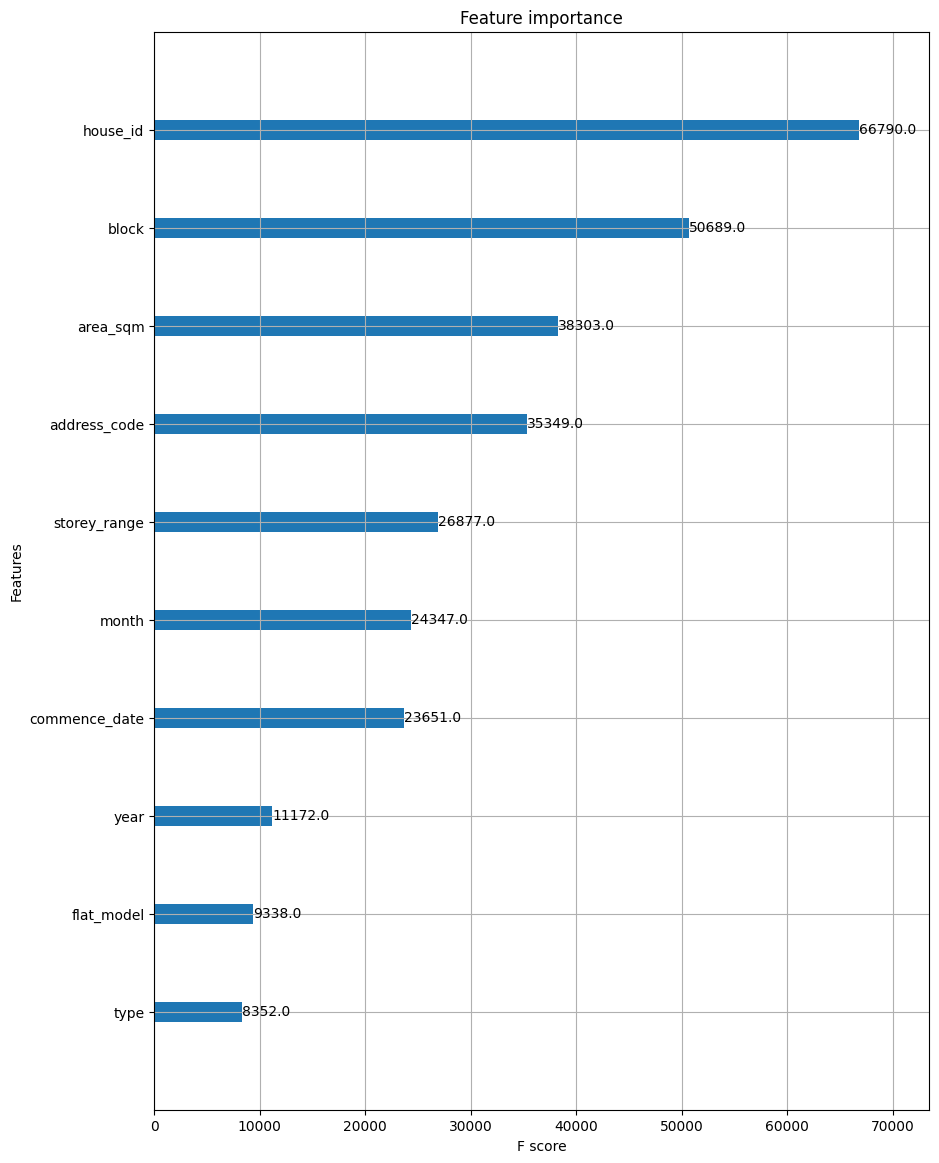

In [35]:
def plot_features(booster, figsize):
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

plot_features(model, (10,14))

- 피처 중요도 시각화: 모델의 피처 중요도를 시각화합니다.

피처 중요도를 시각화하여 모델이 어떤 피처에 중점을 두었는지 확인

plot_importance 함수를 사용하여 피처 중요도를 시각화

### 하단부터 교차 검증 수행 및 모델 평가

In [36]:
# 교차 검증 수행 (5-Fold 교차 검증)
cv_scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_mean_absolute_error')

# MAE의 음수 값을 반환하므로, 이를 양수로 변환하여 해석
mae_scores = -cv_scores

- 교차 검증 수행: 5-Fold 교차 검증을 수행하여 모델의 성능을 평가합니다. MAE의 음수 값을 반환하므로, 이를 양수로 변환하여 해석합니다.

In [37]:
print("교차 검증 MAE 점수:", mae_scores)
print("평균 MAE:", mae_scores.mean())
print("표준 편차:", mae_scores.std())

교차 검증 MAE 점수: [11747.32534609 11818.74486414 11767.63992645 11656.39870479
 11828.65168388]
평균 MAE: 11763.752105068492
표준 편차: 61.718498030905316


- 교차 검증 결과 출력: 교차 검증 MAE 점수, 평균 MAE, 표준 편차를 출력합니다.

In [38]:
# 모델 훈련 및 예측
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 평가 지표 계산
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Train MAE: {train_mae}, Train R^2: {train_r2}')
print(f'Test MAE: {test_mae}, Test R^2: {test_r2}')


Train MAE: 5647.573107023515, Train R^2: 0.9953081179370831
Test MAE: 11542.668422163953, Test R^2: 0.9783941738247591


- 모델 재훈련 및 예측: 훈련 세트와 테스트 세트에서 모델을 재훈련하고 예측 값을 생성합니다.

- 평가 지표 계산: 훈련 세트와 테스트 세트에서 MAE와 R^2 점수를 계산합니다.

- 평가 지표 출력: 훈련 세트와 테스트 세트의 MAE와 R^2 점수를 출력합니다.

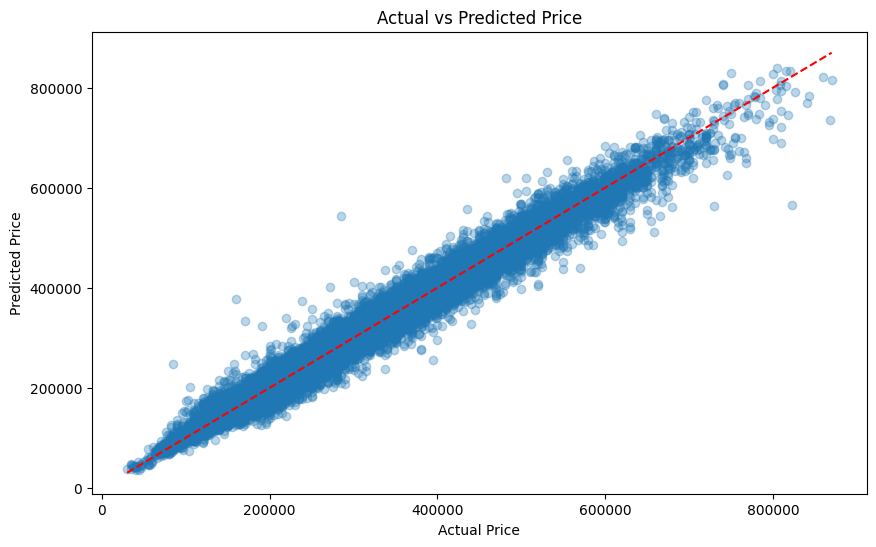

In [39]:
# 실제 값 vs 예측 값 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

- 실제 값 vs 예측 값 시각화: 테스트 세트의 실제 값과 예측 값을 시각화합니다.

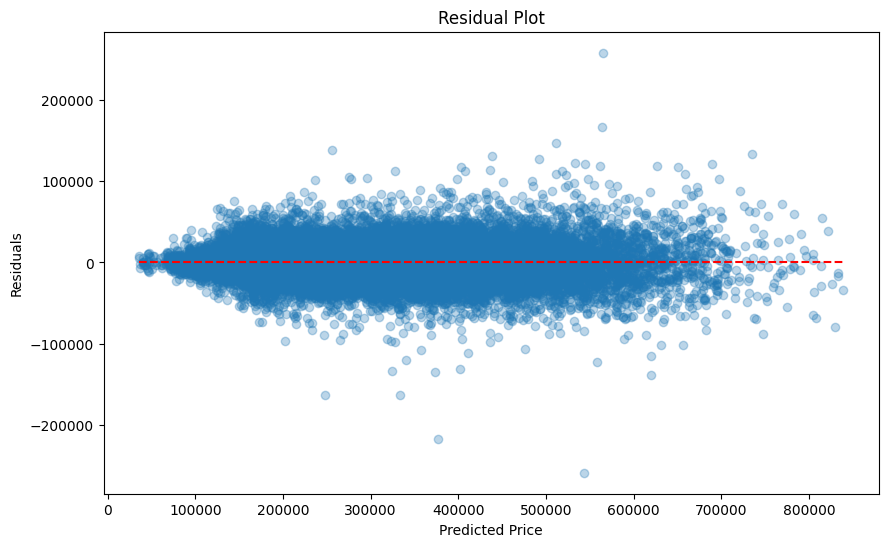

In [40]:
# Residuals
#1. Residual Plot (잔차 플롯) 잔차 플롯은 실제 값과 예측 값의 차이(잔차)를 시각화하여 예측의 정확성을 평가하는 데 도움을 줍니다.
residuals = y_test - y_pred_test

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, alpha=0.3)
plt.hlines(y=0, xmin=y_pred_test.min(), xmax=y_pred_test.max(), colors='r', linestyles='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

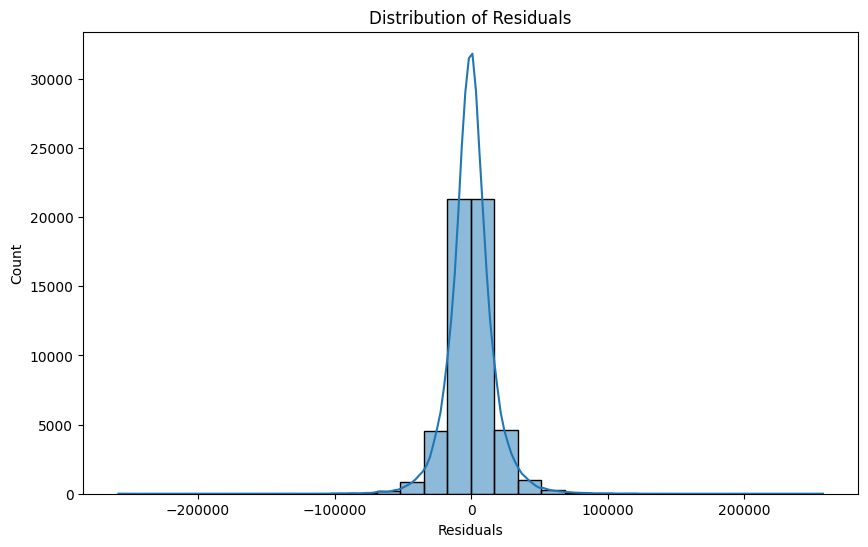

In [41]:
#2. Distribution of Residuals (잔차 분포) 잔차 분포는 모델이 과대평가나 과소평가하는 경향을 이해하는 데 도움을 줍니다.
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

<Figure size 1000x800 with 0 Axes>

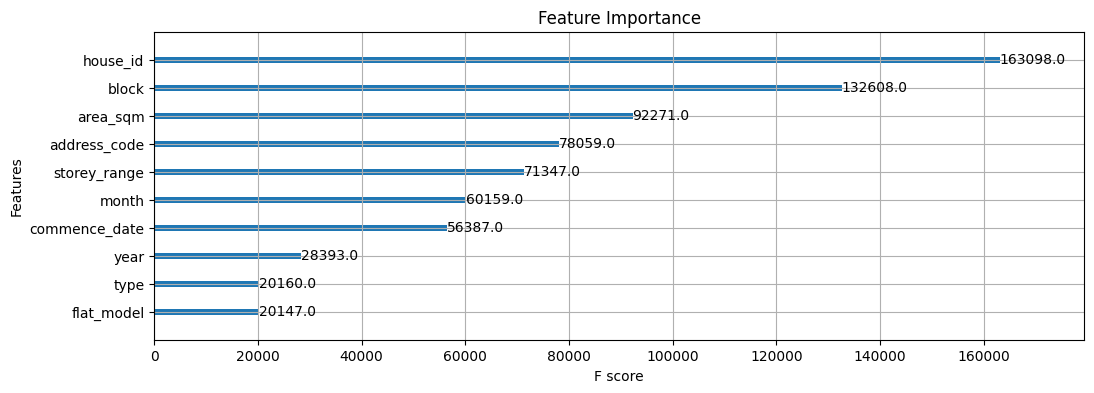

In [42]:
#3. Feature Importance (피처 중요도) XGBoost 모델에서 각 피처의 중요도를 시각화하여 어떤 피처가 예측에 중요한 역할을 하는지 알 수 있습니다.

from xgboost import plot_importance

plt.figure(figsize=(10, 8))
plot_importance(model)
plt.title('Feature Importance')
plt.show()

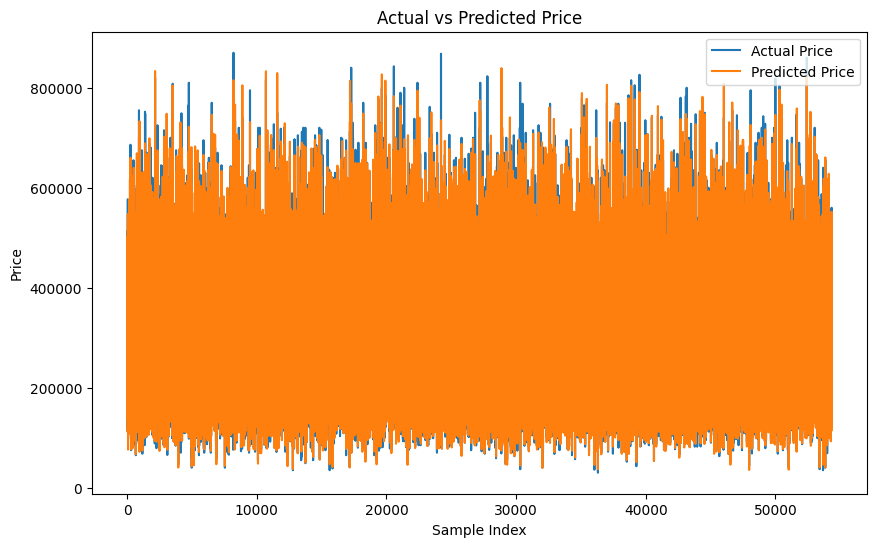

In [43]:
#4. Actual vs Predicted Line Plot (실제 vs 예측 선형 그래프) 실제 값과 예측 값을 선형 그래프로 비교하여 예측 성능을 평가할 수 있습니다.

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_pred_test, label='Predicted Price')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()

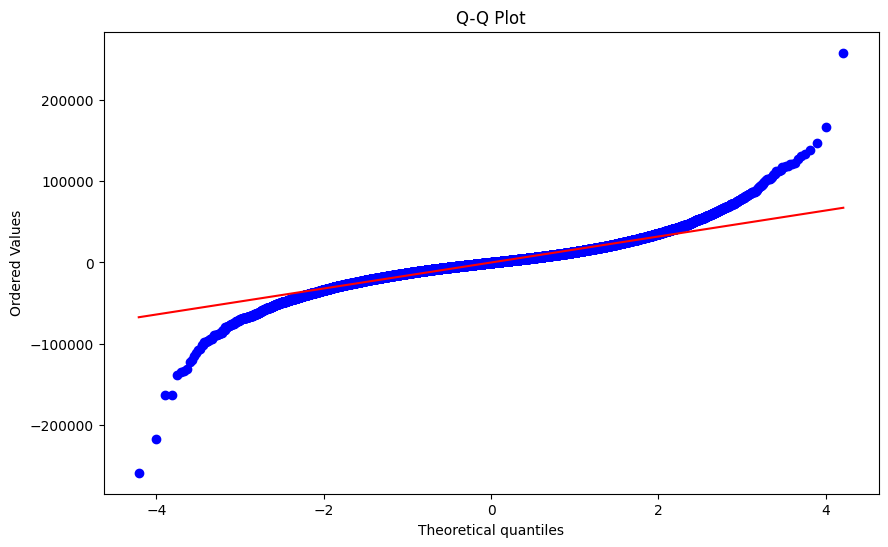

In [44]:
#Q-Q Plot (Quantile-Quantile Plot) 잔차가 정규 분포를 따르는지 확인하기 위해 Q-Q 플롯을 사용할 수 있습니다.

import scipy.stats as stats

# Residuals
residuals = y_test - y_pred_test

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

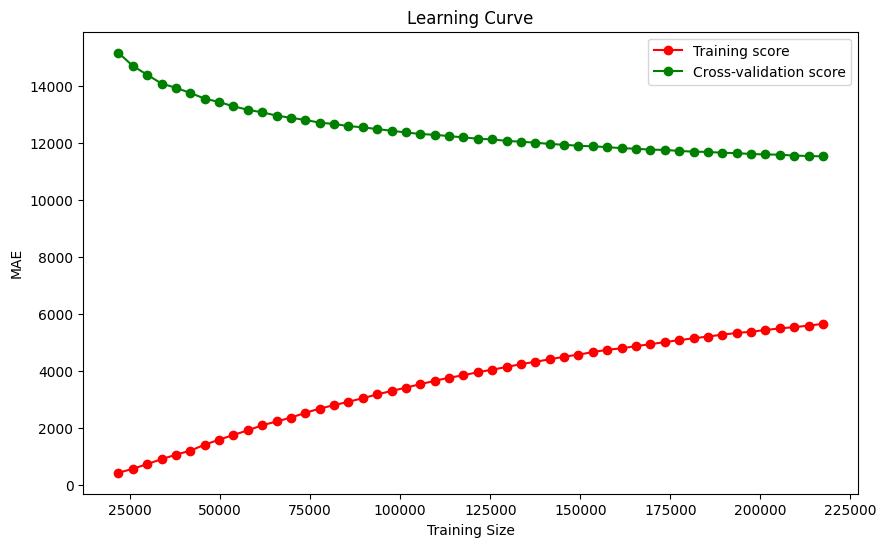

In [45]:
#Learning Curve (학습 곡선) 학습 곡선은 모델의 훈련 및 검증 성능을 학습 샘플 수에 따라 시각화합니다.

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 50))

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('MAE')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

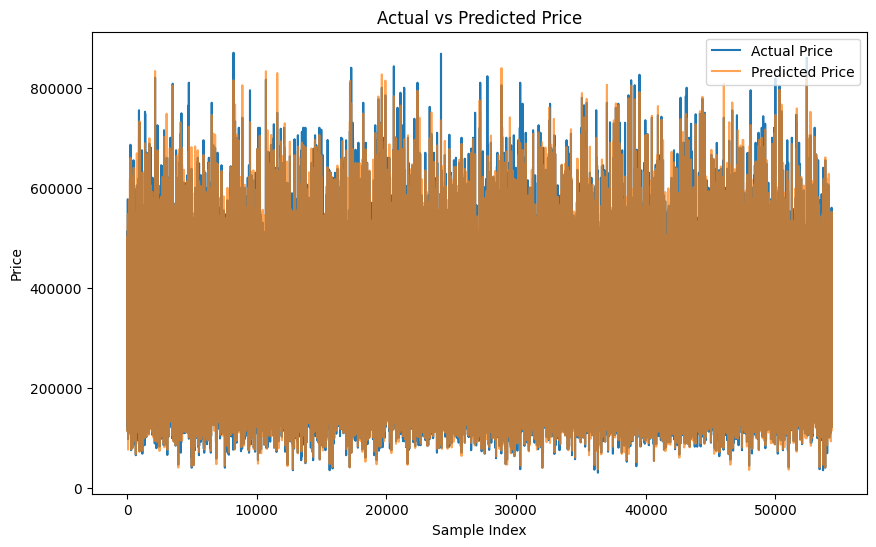

In [46]:
#Predicted vs Actual Line Plot (예측 vs 실제 선형 그래프) 실제 값과 예측 값을 선형 그래프로 비교하여 예측 성능을 평가합니다.

plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Price')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted Price', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()

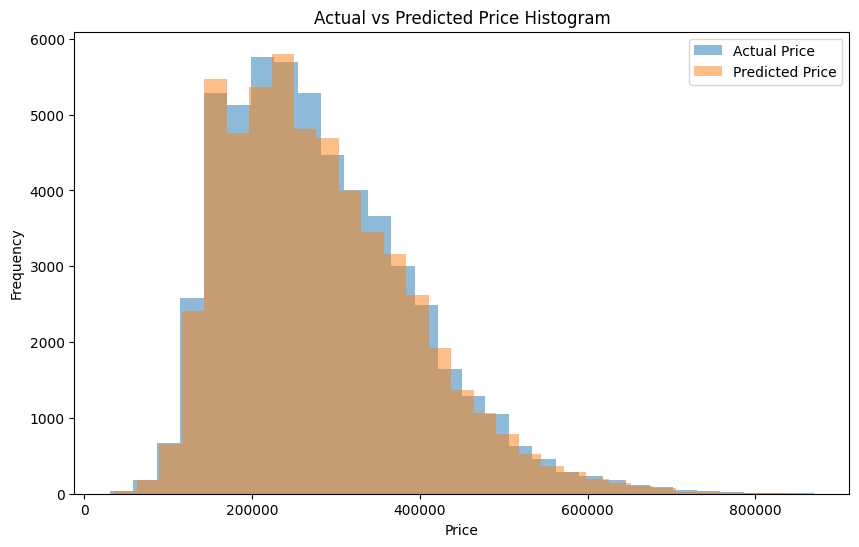

In [47]:
#Predicted vs Actual Histogram (예측 vs 실제 히스토그램) 실제 값과 예측 값의 분포를 히스토그램으로 비교합니다.

plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='Actual Price')
plt.hist(y_pred_test, bins=30, alpha=0.5, label='Predicted Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Actual vs Predicted Price Histogram')
plt.legend()
plt.show()